In [3]:
from FeaturesImportance import *
from Signals import *

import sys
import os
# Ajoutez le chemin du dossier parent à la variable d'environnement PYTHONPATH
parent_path = os.path.abspath("/Users/lucasinglese/Desktop/Challenge/6. CODES/FEATURES")
sys.path.append(parent_path)

from FeaturesLibrary import *

In [4]:
df = pd.read_csv("../../../Alpha-Quant-Course/Data/FixTimeBars/AUDUSD_4H_Admiral_READY.csv")

In [5]:
df = future_DC_market_regime(df,0.03)

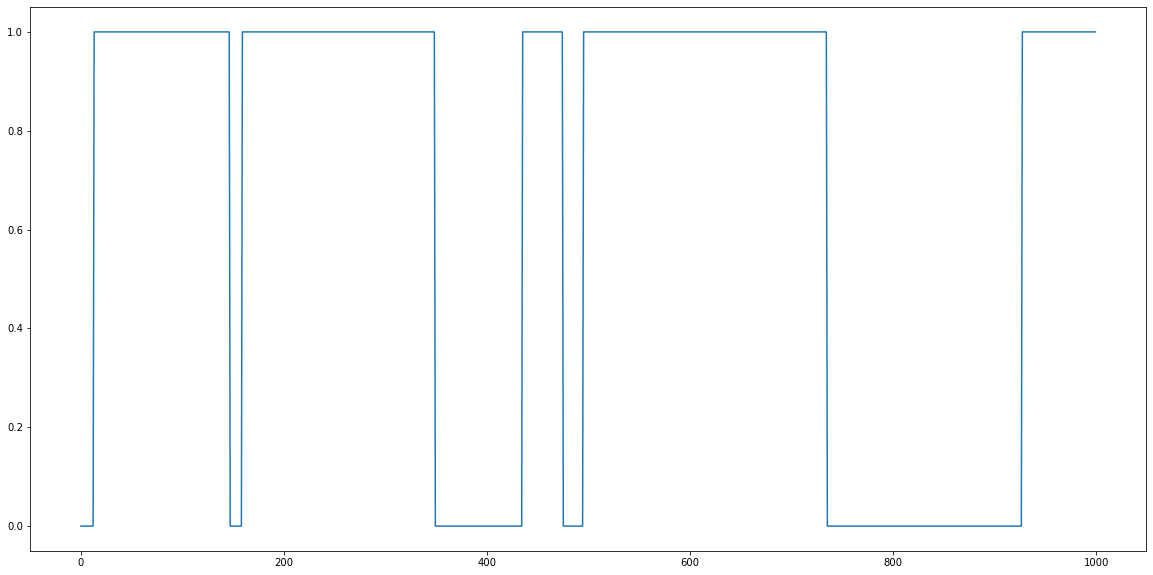

In [6]:
dft = df.iloc[2000:3000].reset_index()
plt.figure(figsize=(20, 10))
plt.plot(dft['future_market_regime'], label='Price')
plt.show()

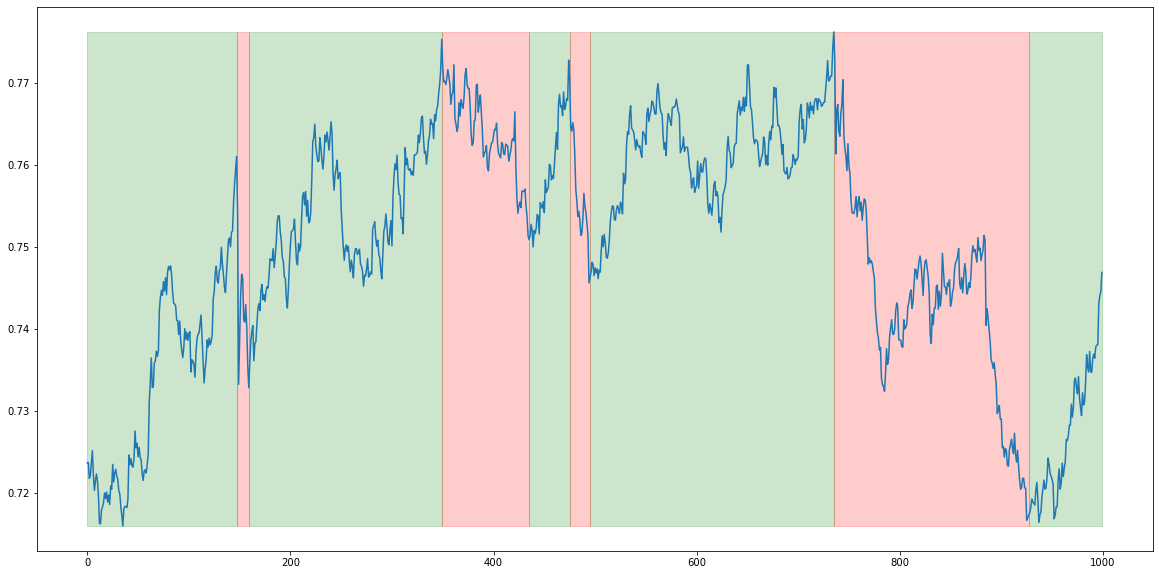

In [12]:
# Take the data
dfc = df.iloc[2000:3000].reset_index()

# Extract DC and Trend events
dc_events_up, dc_events_down, dc_events = calculate_dc(dfc, threshold=0.03)
trend_events_down, trend_events_up = calculate_future_trend(dc_events_down, dc_events_up, dfc)


min_price = dfc['close'].min()
max_price = dfc['close'].max()

plt.figure(figsize=(20, 10))
plt.plot(dfc['close'].iloc[0:,], label='Price')

# Add DC and OS events to the plot
for start, end in trend_events_up:
    plt.fill_between(dfc.index[start:end+1], min_price, max_price, alpha=0.2, color='green', label='DC Event')
    
for start, end in trend_events_down:
    plt.fill_between(dfc.index[start:end+1], min_price, max_price, alpha=0.2, color='red', label='DC Event')

last_point = max(trend_events_down[-1][1], trend_events_up[-1][1])
if trend_events_down[-1][1] < trend_events_up[-1][1]:
    plt.fill_between(dfc.index[last_point:len(dfc)], min_price, max_price, alpha=0.2, color='red', label='DC Event')
else:
    plt.fill_between(dfc.index[last_point:len(dfc)], min_price, max_price, alpha=0.2, color='green', label='DC Event')

    
plt.show()